# Sentiment Analysis and Topic Modeling of Meta Quest 2 Product Reviews

<h3 align="center">
  Abstract
</h3>

This study aims to analyze the sentiment and identify the main topics discussed in Meta Quest 2 product reviews scraped from the Argos website using Selenium. To achieve this goal, we first preprocessed the reviews by removing unwanted characters and applying text preprocessing techniques. Then, we applied sentiment analysis using a machine learning classifier to classify the reviews into positive, negative, and neutral categories. Finally, we used topic modeling to identify the main themes discussed in the reviews. The results of the sentiment analysis showed that a majority of the reviews were positive, while the topic modeling revealed that the main topics discussed included battery life, fun and overall satisfaction. the results are visualized using word cloud and line charts. The insights gained from this analysis can potentially be useful for understanding customer opinions and preferences, as well as identifying potential issues or areas for improvement in the VR headset.




## 1.Introduction
<p> Virtual reality (VR) headsets have become increasingly popular in recent years, offering a new level of immersion and interactivity for gaming, entertainment, education and even socializing. As the VR industry continues to grow, it is important for companies to understand the sentiment and concerns of their customers in order to improve the user experience and stay competitive in the market [1]. With the emergence of the metaverse, a virtual world that is accessed through the internet and where people can interact with each other and virtual objects, it is even more crucial for businesses to understand the sentiment and topics being discussed by VR headset users. </p>
<p>
the Meta (Oculus) Quest 2 offers a good value for its price [2] and has a large selection of available content. By analyzing the sentiment and identifying the main topics discussed in reviews of the Meta Quest 2, businesses and developers can gain insights into customer opinions and preferences, as well as identify potential areas for improvement in the product. The Meta Quest 2's wide selection of content and versatility in terms of use make it an ideal subject for such analysis.
</p>

### 1.1.Context
<p>
Sentiment analysis (also known as opinion mining or emotion AI) is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information [3]. This allows us to understand the emotional tone and sentiment expressed in the text by classifying the text into positive or negative or neutral. which is why Sentiment analysis uses supervised machine learning approach.
</p>
<p>
Topic modeling is an unsupervised machine learning approach for identifying and extracting the most important themes or topics from a collection of texts. It is a crucial aspect of natural language processing (NLP) as it allows us to identify and analyze the most relevant information contained in a large corpus of text. By reducing the number of features (i.e., words) that we need to consider, we can focus our attention on the most meaningful and relevant content, rather than being overwhelmed by the sheer volume of data [4]. This enables us to more effectively analyze and understand the underlying themes and concepts contained in the texts.  
</p>



### 1.2.Aims and objectives
The main aim of this notebook, is to analyze the sentiment of the reviews and identify the main topics discussed in Meta Quest 2 product reviews scraped from the Argos website with the help of visualizations

#### 1.2.1.Methodology
Here's the approach that we will be taking for our analysis described in the following steps:
- Scrape product reviews from the Argos website.
- Preprocess the data by cleaning and standardizing it for further analysis.
- Perform sentiment analysis on the reviews to determine the overall sentiment expressed in each review.
- Identify the main topics discussed in the reviews using topic modeling.
- Analyze the reviews for each identified topic to gain insights into the specific issues or aspects that are being discussed.
- Break down the sentiment analysis results by topic to understand how the sentiment varies across different topics.
- Extract relevant keywords from the reviews to further understand the specific aspects or features that are being discussed.
- Communicate the findings effectively through the use of visualization techniques such as bar charts and wordclouds.


#### 1.2.2.Asking the Questions that will guide us through our Analysis
Asking relevant and focused questions in the pre-analysis stage is important for guiding the direction of the analysis and ensuring that we draw meaningful conclusions, Here are some questions that will explore in our analysis:

- What are some common themes that emerge across the different topics?
- Are there any trends or patterns in customer sentiment that stand out?
- Is there a relationship between the sentiment of the reviews and the topics discussed?
- How can the insights gained from this analysis be used to improve the product or the customer experience?



### 1.3.Dataset and Limitations

#### 1.3.1.Dataset:
For the purpose of this project, we utilize the Selenium web scraping library to obtain a dataset of reviews for the Meta Quest 2 virtual reality headset from the Argos website, a leading retailer in the United Kingdom. The reason is, we can use the Selenium library due to its ability to handle dynamic websites (website that generates content on the fly using server-side programming languages) which will be needed for scraping the reviews.

Here's an overview of our dataset:

- Source: Scraped from Argos website
- Size: 1310 records, 4 columns
- Variables:
  - `title`: Title of the product being reviewed
  - `reviews`: Text of the review
  - `location`: Location of the reviewer
  - `timestamp`: Date and time of the review submission
- Format: CSV flat file
- Scraping:
  - `reviews_list` and `timestamp` were first scraped from the Argos website.
  - `reviews_list` contains the title, review, and location for each review, in that order.
  - `timestamp` contains the datetime of the review.
  - Data was then stored in two lists (`reviews_list` and `timestamp`) locally using pickle.
- Preprocessing:
  - `reviews_list` and `timestamp` were merged into a dictionary.
  - The dataset was labeled.
  - The labeled dataset was then stored locally as a CSV file.
  - Minor formatting issues corrected.
  - Datetime formatting was applied to the `timestamp` column.
  - Text preprocessing was performed on the `title`, `reviews`, and `location` columns.
  
#### 1.3.2.Limitations
It is important that we consider the limitations of our dataset when interpreting the results. Here are some factors that should be taken into account in our results:

- We limited the data used in this study to reviews from the Argos website for a single VR headset (Meta Quest 2). This means that the results may not be representative of the broader market for VR products. We must consider this limitation when interpreting the results of the study.
- The Argos website is only available in the United Kingdom. This means that the results of the analysis may not be representative of the broader market for VR products outside of the UK.
- The Reviews on Argos may differ in terms of content, sentiment, and other characteristics from reviews on other websites. Therefore we must consider this when interpreting the results of the study, and be mindful of the potential for bias due to the limited geographical scope.
- The results of the topic modeling is influenced by the choice of modeling algorithm and the number of topics selected. Different choices may lead to slightly different results.




### 1.4.Ethical considerations 
We need to be aware of the legal and ethical implications of scraping data from the Argos website and how we plan to use this data for our study, here are the Ethical considerations related to the Argos website:

- According to the website terms and conditions of Argos, scraping data for non-commercial purposes is permitted. This means that individuals or organizations may use web scraping techniques to extract data from the Argos website for research or personal use, as long as the data is not being used for commercial gain. [5]
- According to the website terms and condition of Argos, it is legal to use data that is publicly available, provided that it is used ethically and in accordance with the terms and conditions of the website. [5]  
- According to the information contained in the robots.txt file of the Argos website, it does not appear that scraping reviews is explicitly disallowed. [6]





### 1.5.Dependencies

The following code will create a text file called requirements.txt that lists all the dependencies needed for this notebook

In [31]:
!pip freeze > requirements.txt

use ` pip install -r requirements.txt ` to install all the packages and versions listed in the requirements.txt

In [ ]:
# pip install -r requirements

## 2.Extracting Product Reviews from the Web with Selenium
<p>
 Web scraping is the process of extracting data from websites by using automated tools or programs. It is a useful technique for collecting large amounts of data from websites, especially when the data is not readily available for download. In this study, we used Selenium, a popular web automation tool, to scrape product reviews from the Argos website. </p>
<p>
Selenium is an open-source library that allows developers to write scripts in various programming languages to automate web browser interactions. It can simulate user actions such as clicking links, filling out forms, and navigating pages, and it can extract data from the web pages by using techniques such as web element selection, DOM parsing, and XPath queries. [7] </p>

<p> For our study, we use Selenium to navigate to the product page of Meta Quest 2 VR on the Argos website and retrieve the reviews, location of the reviewer, and timestamp of the review. We write code that uses the Selenium webdriver to open a web browser, navigate to the product page, and extract the data from the page elements. We also implement error handling and retry logic to ensure that the script can handle any issues that might arise during the scraping process, such as network errors or changes in the page structure. Here's the explanation in a procedural way
</p>    
<ol>
    <li>The Chrome web driver opens and navigates to the specified URL.</li>
    <li>The cookie consent prompt is clicked to accept cookies.</li>
    <li>The <code>reviews</code> button is clicked to navigate to the reviews section of the page.</li>
    <li>The code iterates through each page of reviews:
        <ol>
            <li>The code tries to locate the 'show more' button using the first specified XPATH. If the button is not found within the specified time, the TimeoutError exception is caught.</li>
            <li>If the TimeoutError exception is caught, the code tries to locate the 'show more' button using the second specified XPATH. If the button is not found within the specified time, the TimeoutError exception is caught and a message is printed.</li>
            <li>If the 'show more' button is found, it is clicked.</li>
        </ol>
        </li>
    <li>The reviews section of the page is located and stored in a variable.</li>
    <li>All <code>p</code> tags within the reviews section are found and stored in a list called <code>reviews.</code></li>
    <li>All <code>time</code> tags within the reviews section are found and stored in a list called <code>scraped_timestamps</code>.</li>
    <li>The code iterates through the "reviews" list and appends the text of each element to a new list called <code>reviews_list</code>.</li>
    <li>The code iterates through the ´scraped_timestamps´ list and appends the datetime attribute of each element to a new list called <code>timestamps</code>.</li>
    <li>The web driver browser closes.</li>
    <li>The <code>reviews_list</code> and <code>timestamps</code> lists are returned.</li>
</ol>

<code>note that it can take up to 5 to 10 minutes depending on max pages input has been selected to finish scraping.</code>

In [ ]:
# import selenium library and webdriver modules
import selenium
from selenium import webdriver

# import By class and Options class from selenium.webdriver.
# By is used to specify which elements on the page to locate,
# Options is used to set options for the Chrome web browser.
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

# import NoSuchElementException from selenium.common.exceptions for error handling.
from selenium.common.exceptions import NoSuchElementException

# import WebDriverWait and expected_conditions from selenium.webdriver.support
# WebDriverWait is used to wait for elements to load on the page,
# expected_conditions is used to define conditions for waiting for elements to load on the page
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


def scrape_reviews(url, maxPages):
    import time
    driver = webdriver.Chrome()
    driver.get(url)
    print(driver.title)

    # press cookies button
    cookie = driver.find_element(By.ID, 'consent_prompt_submit')
    cookie.click()

    # opens the review section
    reviewsBtn = driver.find_element(By.ID, 'reviews')
    reviewsBtn.click()
    
    currentPage = 1
    while currentPage <= maxPages:
        time.sleep(1)
        # stores the path of show more button
        btn_XPATH = '//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[' + str(currentPage) + '1]/button'
        # print(btn_XPATH)

        # define the maximum amount of time to wait
        wait_time = 10

        # try to locate the show more button using the By XPATH
        try:
            showBtn = WebDriverWait(driver, wait_time).until(
                EC.presence_of_element_located((By.XPATH, btn_XPATH))
            )
            showBtn.click()
            currentPage += 1

        # if the show more button is not found using the By XPATH method, catch the TimeoutError exception
        except:
            # try to locate the show more button using the By CLASS_NAME method
            try:
                showBtn = WebDriverWait(driver, wait_time).until(
                    EC.presence_of_element_located((By.XPATH, '//button[@data-test="show-x-more-reviews-button"]'))
                )
                showBtn.click()
                currentPage += 1
            except TimeoutError:
                # the show button was not found using either strategy
                print("show button could not be located...")
                currentPage += 1


    # stores the reviews section
    reviews_section = driver.find_element(By.ID, 'reviews-accordion-accordion-content-reviews-accordion')  
    # stores all p tags of the reviews section
    reviews = reviews_section.find_elements(By.TAG_NAME, 'p')
    # stores all the scraped time
    scraped_timestamp = reviews_section.find_elements(By.TAG_NAME, 'time')
    
    # list to store the text of each review (title, review, location)
    reviews_list = []
    # iterates through the list of review elements
    for review in reviews:
        # stores the text of the reviews element to the list
        reviews_list.append(review.text)

    # list to store the datetime attributes of the scraped 'time' elements
    timestamps = []
    # iterates through the list of scraped 'time' elements
    for time in scraped_timestamp:
        # gets the datetime attribute of the time element 
        datetime = time.get_attribute("datetime")
        # stores datetime to the list
        timestamps.append(datetime)
        
    ## closes the browser
    driver.close()
    
    return reviews_list, timestamps

url = "https://www.argos.co.uk/product/9461987?clickSR=slp:term:meta%20quest%202:2:22:1"
reviews_list, timestamps = scrape_reviews(url=url, maxPages=130)


We save the lists to a local file because it allows us to use them for preprocessing to avoid errors and repetition. Scraping data from websites can be unreliable due to the possibility of changes in the structure of the website's Document Object Model. By saving the data locally, we can use it for preprocessing without the risk of it being affected by changes to the website and  saving the data locally allows us to access it more easily and avoid the need to scrape the website again, which can save time and resources.

In [ ]:
import pickle

In [ ]:
# Save the reviews_list and timestamps into a file
with open('data.pkl', 'wb') as f:
    pickle.dump((reviews_list, timestamps), f)

In [ ]:
# Load the reviews_list and timestamps from the file
with open('data.pkl', 'rb') as f:
    reviews_list, timestamps = pickle.load(f)

## 3.Data Preprocessing
<p>
The next step is Preprocessing the data. it can help to ensure that the data is clean, consistent, and ready for analysis, and can improve the accuracy and effectiveness of the sentiment analysis and topic modeling techniques.
</p>

### 3.1.Labeling the data
<p>
    
The first step in preprocessing the data is to use the Pandas library to label the data. This involves assigning appropriate names to the columns of the DataFrame. We will assign the names 'Title', 'Review', 'Location', and merge the timestamp list into the dataFrame as 'timestamp' to the columns of the DataFrame. This will help to clarify the meaning and purpose of each column, and will allow us to manipulate and analyze the data using these meaningful names. 
</p>

In [ ]:
import pandas as pd
import csv

def label_reviews(reviews_list):
    reviews_dict = {}
    for i in range(0, len(reviews_list), 3):
        title = reviews_list[i]
        review = reviews_list[i+1]
        location = reviews_list[i+2]
        reviews_dict[i] = {
            'title': title,
            'reviews': review,
            'location': location
    }
        
    return reviews_dict


def generate_df(reviews, timestamps):
    df = pd.DataFrame.from_dict(reviews, orient='index').reset_index(drop=True).drop(index=0)
    df = df[['title', 'reviews', 'location']]
    
    # We need to pad/truncate the timestamps list to match the length of the DataFrame
    
    # if length of timestamps is less than length of df:
    # pad timestamps with None values until length of timestamps is equal to length of df
    # else if length of timestamps is greater than length of df
    # truncate timestamps to length of df
    # add timestamps as a column to df with name 'timestamp' and return df
    if len(timestamps) < len(df):
        # pad timestamps with None values to match the length of the index
        timestamps += [None] * (len(df) - len(timestamps))
    elif len(timestamps) > len(df):
        # truncate timestamps to match the length of the index
        timestamps = timestamps[:len(df)]
    df.insert(loc=3, column='timestamp', value=timestamps)
    return df

reviews = label_reviews(reviews_list)
scraped_df = generate_df(reviews, timestamps)
scraped_df.head()


We save our labeled scraped_df DataFrame into a csv file `data.csv` since using a locally saved CSV file is more reliable and faster for further analysis. We also don't need to scrape the website again to get the dataset.

In [ ]:
# scraped_df.to_csv('data.csv')
scraped_df.to_csv('new_data.csv')

<code>please load the data.csv CSV File that I provided to get the same results in this study by running the cell below</code>

In [1]:
import pandas as pd

# Set the maximum length of the string to display
pd.set_option('display.max_colwidth', None)

try:
    # Read the CSV file into a dataframe
    df = pd.read_csv('data.csv')
except Exception as e:
    print("Error opening file:", e)
    
df.isnull().sum()

Unnamed: 0    0
title         0
reviews       0
location      0
timestamp     0
dtype: int64

In [2]:
# Drop column 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'], inplace=True)
# Print the data type of each column
print(df.dtypes)

title        object
reviews      object
location     object
timestamp    object
dtype: object


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1310 non-null   object
 1   reviews    1310 non-null   object
 2   location   1310 non-null   object
 3   timestamp  1310 non-null   object
dtypes: object(4)
memory usage: 41.1+ KB


### 3.2.Preprocessing datetime
<p>
The next step in our data preprocessing process is to preprocess the timestamps data into a datetime object. This involves converting the timestamps from their current format, which is a string, into a datetime object, then into Year-Month-Day form so that can be easily manipulated and analyzed. 
</p>

In [4]:
from datetime import datetime
### https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior ###

# convert the 'timestamp' column to datetime object
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))

# Create a new column with the year, month, and day in the format "yyyy-mm-dd"
df['date'] = df['timestamp'].apply(lambda x: x.strftime("%Y-%m-%d"))

# remove the 'timestamp' column
df = df.drop(columns=['timestamp'])

# rename the 'date' column to 'timestamp'
df = df.rename(columns={'date': 'timestamp'})

In [5]:
df

,title,reviews,location,timestamp
0,Fast and Accurate Shopping,"I was very pleased with the stock accuracy, the help of the employees and the fast shopping.","bg0139, 25 - 34, Ankara, turkey",2022-12-22
1,Mr Donatas Barkus,"Good staff, my family very like","Donatas, 35 - 44, London",2022-12-21
2,Great product,My son enjoying it. Must have item for all age,"Nilu, 35 - 44, Droitwich",2022-12-21
3,Present for daughter,I bought this for a Christmas present for my daughter very happy with the delivery ewas delivered with care.,"Mandy, 45 - 54, Prescot",2022-12-14
4,Meta Quest 2,Excellent value for money. Happy customer would definitely recommend,"Racka, 45 - 54, Teesside",2022-12-13
...,...,...,...,...
1305,"Fun device, Abut not for everyone!","Great fun for my son, but instantly gave my daughter and I motion sickness. It does say this in the blurb, but it affected the two of us quite badly. My son loves it though, so as long as you have plenty of space to move around I’m told it’s brilliant!","Mathcornish, 45 - 54, West Sussex",2021-09-22
1306,Great family fun,"My 8 year old autistic son loves to play with his occulus it gives him some sensory input and gives me some piece when hes playing lol. Occulus is also a great family adventure fun game from virtual reality car racing to shooting targets and many great brain training and competitive games it's a good choice for family fun times. ;,)","Argosprobuyer, 25 - 34, Liverpool",2021-09-22
1307,"Not bad, not bad at all","I bought this as I bought the Rift S... Turns out their last patch stopped the use of USB C adaptors... I had to buy a Quest 2. I am not disappointed. Very good non PC-VR kit. However, Oculus software is a bit rubbish.","ahyman1990, 25 - 34, Manchester",2021-09-21
1308,Worth it,Have been waiting to get an Xbox series X. But after it’s taken so long I decided to try the world or VR without a Pc. Great for those into gaming and those who aren’t. My other half uses it for escape rooms. Downside is that streaming drops out often abs you can only export videos via Facebook which isn’t useful.,"Rob, 25 - 34, Chelmsford",2021-09-21


### 3.4.Text preprocessing
the next step of our process is to clean and filter the noise from the text by using regular expressions and natural language processing tools (NLTK) to get accurate results in our analysis. 

In [6]:
import re
import nltk

# Download the stopwords dataset from NLTK
nltk.download('stopwords')

# Download the wordnet dataset from NLTK (useful for text classification)
nltk.download('wordnet')

# downloads the the Open Multilingual WordNet "omw" dataset from NLTK
nltk.download('omw-1.4')

# import stop words from NLTK
from nltk.corpus import stopwords

# import word tokenizer from NLTK
from nltk.tokenize import word_tokenize

# import word Lemmatizer from NLTK
from nltk.stem import WordNetLemmatizer

# import a list of stop words in the English language from NLTK
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHiFT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHiFT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SHiFT\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### 3.4.1.Preprocessing location
The next step in our data preprocessing process is to preprocess the location data in order to extract the city of each review. We can do this by using regular expressions (regex).

In [7]:
def get_city_location(row):
    # access value of the row in location column and stores it in value variable
    value = row['location']
    complete_location = re.split(r",", value)
    try:
        #third element gives us the name of the city of the customer
        city_location = complete_location[2]
    except:
        # sets it to N/A 
        city_location = "N/A"
    
    return city_location

# apply the extract_city_location() function to each row of the dataframe in the location column
df['location'] = df.apply(get_city_location, axis=1)

### 3.4.1.1.Visaulize reviews count by city

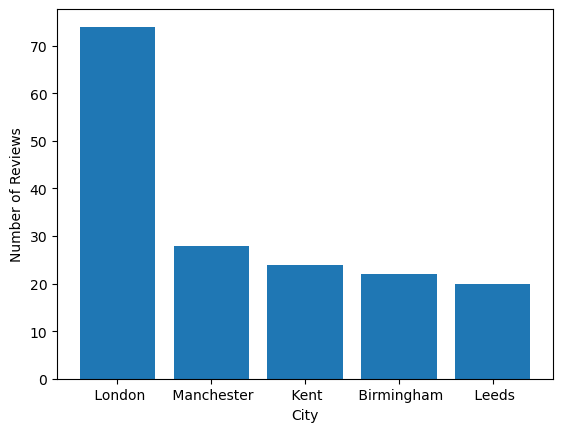

In [8]:
import matplotlib.pyplot as plt
#create a new df that contains all the cities that isnt N\A
filtered_df = df.loc[df['location'] != 'N/A']

# get the top cities by using counter then sorting the values and finally get only the first 5
top_cities = filtered_df['location'].value_counts().sort_values(ascending=False).head(5)

# Plot a bar chart of review counts by city
plt.bar(top_cities.index, top_cities)
plt.xlabel('City')
plt.ylabel('Number of Reviews')
# show the plot
plt.show()

London may have more robust infrastructure or support for VR technology, which could make it easier for consumers in these areas to use and review VR headset products

### 3.4.2.Preprocessing and cleaning text data for Sentiment Analysis and Topic Modelling
In order to get accurate results from sentiment analysis and topic modeling, we develop functions that filter and pre-process text by:

- Implementing regular expressions to strip special characters and punctuation marks. 
- Implementing NLTK for to remove stop words and perform tokenization and lemmatization on the remaining words.
- Concatenating the filtered and pre-processed words to create a cleaned version of the text.
     
**Lemmatization** is the process of reducing a word to its base form. It  produce more accurate and meaningful forms of words than stemming. Hence, lemmatization is often preferred over stemming for tasks that require a high degree of accuracy or interpretability [11], which is needed in sentiment analysis and topic modeling.


In [9]:


# function that removes special characters, punctuations, extra whitespace from text
def strip_special_characters(text):    
    # compile a regular expression pattern that matches one or more spaces
    pattern = re.compile('\s+')
    
    # removes any special characters and punctuations from text
    clean_text = re.sub(r'[^\w\s]',' ',text)
    
    # renoves any underscore from the text
    clean_text = re.sub(r'_',' ',clean_text)
    
    #removes exccess white space from the text
    clean_text = pattern.sub(' ', clean_text)
    
    #returns the text clean from special characters, punctuations, underscore and exccess white space
    return clean_text

# lowercase text
def get_lowercase(text):
    return [word.lower() for word in text]

# tokenize the reviews text 

### lab 5 ### 


def strip_stop_words(text):
    try:
        stop_words = set(stopwords.words('english'))
        cleaned = [word for word in text if word not in stop_words]
        return cleaned
    except:
        # return empty list
        return []
# Lemmatization is generally more accurate than stemming
# If the context in which the words are used is important, lemmatization may be a better choice
# preserve the original meaning of the words and improve the accuracy of the analysis




def lemmatize_words(text):        
    try:
        lemmatizer = WordNetLemmatizer()
        cleaned = [lemmatizer.lemmatize(word) for word in text]
        return cleaned
    except:
        # return empty list
        return []
    
def concatenate_words(text):
    # checks if the input is a list or a string
    if isinstance(text, list):
        tokens = []
        for word in text:
            # Convert each word to a string and add it to the list of tokens
            tokens.append(str(word))
        # Concatenate the tokens with a space separator
        return ' '.join(tokens)
    # checks if the input is a string, return it as is
    if isinstance(text, str):       
        return text    

Apply the filtering to the DataFrame reviews column

In [10]:
df['reviews'] = df['reviews'].apply(strip_special_characters)
df['reviews'] = df['reviews'].apply(word_tokenize)
df['reviews'] = df['reviews'].apply(get_lowercase)
df['reviews'] = df['reviews'].apply(strip_stop_words)
df['reviews'] = df['reviews'].apply(lemmatize_words)
df['reviews'] = df['reviews'].apply(concatenate_words)
df

,title,reviews,location,timestamp
0,Fast and Accurate Shopping,pleased stock accuracy help employee fast shopping,Ankara,2022-12-22
1,Mr Donatas Barkus,good staff family like,London,2022-12-21
2,Great product,son enjoying must item age,Droitwich,2022-12-21
3,Present for daughter,bought christmas present daughter happy delivery ewas delivered care,Prescot,2022-12-14
4,Meta Quest 2,excellent value money happy customer would definitely recommend,Teesside,2022-12-13
...,...,...,...,...
1305,"Fun device, Abut not for everyone!",great fun son instantly gave daughter motion sickness say blurb affected two u quite badly son love though long plenty space move around told brilliant,West Sussex,2021-09-22
1306,Great family fun,8 year old autistic son love play occulus give sensory input give piece he playing lol occulus also great family adventure fun game virtual reality car racing shooting target many great brain training competitive game good choice family fun time,Liverpool,2021-09-22
1307,"Not bad, not bad at all",bought bought rift turn last patch stopped use usb c adaptor buy quest 2 disappointed good non pc vr kit however oculus software bit rubbish,Manchester,2021-09-21
1308,Worth it,waiting get xbox series x taken long decided try world vr without pc great gaming half us escape room downside streaming drop often ab export video via facebook useful,Chelmsford,2021-09-21


## 4.Sentiment Analysis
Sentiment analysis is the process of using computational methods to identify and classify opinions expressed in a text, with the aim of determining the writer's attitude towards a particular topic, product, or other subject. This process involves identifying and interpreting the emotions, opinions, or evaluations expressed in the text, and categorizing them as positive, negative, or neutral. [3] </br>
Heres the following steps on how I calculated the sentiments of each review by using 'Vader' pre-trained model from NLTK and calculating the composite score:
<ol>
  <li>The <code>classify_sentiment</code> function takes a list of tokens as input and concatenates them into a single string using the <code>concatenate_words</code> function.</li>
  <li>If the input is not a string, the function returns a dictionary with default values for the sentiment and the percentages of positive, negative, and neutral sentiments.</li>
  <li>The function then instantiates a <code>SentimentIntensityAnalyzer</code> object from the <code>nltk.sentiment.vader</code> library and uses it to calculate the sentiment scores for the input string.</li>
  <li>The <code>calculate_sentiment_percent</code> function is called to calculate the percentages of positive, negative, and neutral sentiments using the sentiment scores.</li>
  <li>If the compound score (a composite score that takes into account the positive, negative, and neutral scores) is greater than or equal to 0.05, the function returns a dictionary with the sentiment label "positive" and the calculated percentages.</li>
  <li>If the compound score is less than or equal to -0.05, the function returns a dictionary with the sentiment label "negative" and the calculated percentages.</li>
  <li>If the compound score is between -0.05 and 0.05 (inclusive), the function returns a dictionary with the sentiment label "neutral" and the calculated percentages.</li>
  <li>If any errors occur during the execution of the function, a dictionary with default values for the sentiment and the percentages is returned.</li>
</ol>

In [11]:
# using sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def calculate_sentiment_percent(sentiment):
    # validates if the the dictionary has the correct keys pos, neg and neu   
    keys = {'pos', 'neg', 'neu'}
    if not keys.issubset(sentiment.keys()):
        raise ValueError('must have the following three keys: "pos", "neg", "neu"')
        
    # Calculate the percentage of positive, negative, and neutral sentiments
    total = sum(sentiment.values())
    pos_percent = sentiment['pos'] / total * 100
    neg_percent = sentiment['neg'] / total * 100
    neu_percent = sentiment['neu'] / total * 100
    
    # returns the percentage of positive, negative, and neutral sentiments
    return pos_percent, neg_percent, neu_percent

def classify_sentiment(tokens):
    text = concatenate_words(tokens)
    # validates if the the input is a string
    if not isinstance(text, str):
        return {'sentiment': 'N\A', 'pos_percent': 0, 'neg_percent': 0, 'neu_percent': 0}

    try:
        sid = SentimentIntensityAnalyzer()
        sentiment = sid.polarity_scores(text)

        pos_percent, neg_percent, neu_percent = calculate_sentiment_percent(sentiment)

        if sentiment['compound'] >= 0.05:
            return {'sentiment': 'positive', 'pos_percent': pos_percent, 'neg_percent': neg_percent, 'neu_percent': neu_percent}
        elif sentiment['compound'] <= -0.05:
            return {'sentiment': 'negative', 'pos_percent': pos_percent, 'neg_percent': neg_percent, 'neu_percent': neu_percent}
        else:
            return {'sentiment': 'neutral', 'pos_percent': pos_percent, 'neg_percent': neg_percent, 'neu_percent': neu_percent}
    except:
        return {'sentiment': 'N\A', 'pos_percent': 0, 'neg_percent': 0, 'neu_percent': 0}

In [12]:
pd.set_option('display.max_rows', 1000)

df['sentiment'] = df.apply(lambda row: classify_sentiment(row['reviews'])['sentiment'], axis=1)

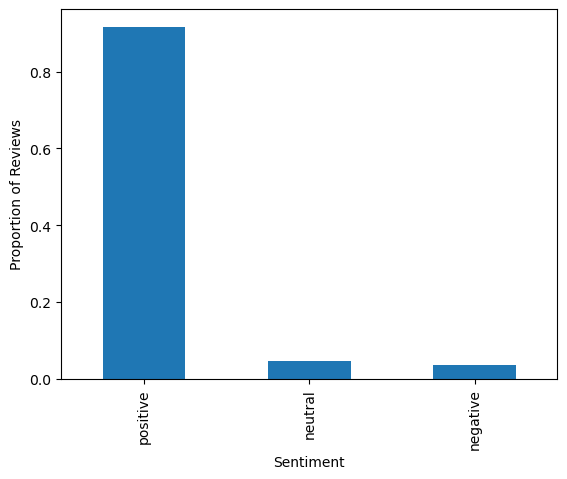

In [13]:
import matplotlib.pyplot as plt
# calculate the proportions of reviews per sentiment (positive, negative and neutral)
counts = df['sentiment'].value_counts().sort_values(ascending=False) / len(df)

# plot the counts as a bar plot
counts.plot(kind='bar')

# add label to the x axis
plt.xlabel('Sentiment')

# add label to the y axis
plt.ylabel('Proportion of Reviews')

# Show the plot
plt.show()

It appears that the vast majority of reviews for the Meta Quest 2 are positive. This suggests that most people who have used the product are satisfied with it and have had a positive experience. It is also worth noting that a small percentage of reviews were neutral or negative, which suggests that there may be some issues or areas for improvement with the product. To further understand the sentiment of the reviews, we will extract the themes present in these sentiment to identify any potential issues or areas for improvement of this product.

## 5.Topic Modelling

Topic Modelling is a technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents [8]. In this notebook, we will be using the BERTopic algorithm for our topic modeling

### 5.1.Extracting Topics using BERTopic
BERTopic leverages deep learning transformer models that are used to extract embedding represrentations from text. The embeddings are then clustered through dimensionality reduction with UMAP and HDBSCA in an unsupervised learning approach. The main advantage is leveraging the powerful transformer model architectures that are able to understand the semantic meaning from text through the self-attention mechanism. [9].

In [14]:
#!pip install bertopic
from bertopic import BERTopic
from umap import UMAP

In [15]:
# stores the 'reviews' column to a list of documents
docs = df.reviews

# creates an instance of the UMAP model with specified parameters:
#  - n_neighbors: the number of nearest neighbors used in the UMAP algorithm
#  - n_components: the number of dimensions to reduce the data to using UMAP
#  - min_dist: the minimum distance between points in the UMAP space
#  - metric: the distance metric used to calculate distances in the UMAP space
#  - random_state: the seed for the UMAP random number generator (default seed I used is 43)
umap_model = UMAP(n_neighbors=15, n_components=5, 
                  min_dist=0.0, metric='cosine', random_state=43)

# creates an instance of the BERT-based topic model, using the specified UMAP model as a dimensionality reduction method
topic_model = BERTopic(umap_model=umap_model)
# transforms the topic model on the list of documents, returning the identified topics and their probabilities
topics, probs = topic_model.fit_transform(docs)

In [16]:
# get_topic_info method is a member function of the BERTopic to retrieve information about the identified topics.
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,130,-1_product_fun_great_family
1,0,389,0_vr_headset_game_oculus
2,1,358,1_son_love_bought_christmas
3,2,157,2_game_easy_bought_love
4,3,83,3_ago_month_bought_happy
5,4,73,4_product_happy_excellent_item
6,5,25,5_family_fun_great_whole
7,6,24,6_argo_service_always_happy
8,7,22,7_battery_life_use_thing
9,8,21,8_world_fun_much_like


The results show the top 12 topics identified by the model, along with the number of times each topic appears in the collection of documents. It is worth noting that according to BERTopic documentation [9], the "-1" topic is typically a noise term that should be ignored, as it is often used to represent documents that do not fit into any of the other identified topics. The remaining topics represent the main themes or topics present in the collection of documents.

In [17]:
# add review topics to dataframe
df["topic"] = topics

### 5.2.Keyword Extraction using keyBERT
Keywords in our context, is words that are particularly important, more frequent and relevant to the content of our reviews.
We will use keyBERT, which is a specialized tool specifically designed for keyword extraction compared to BERTopic, which is designed mainly for Topic modelling [10]. Since we are interested in extracting relevant keywords from the reviews while, we will use the keyBERT model.



In [18]:
# ! pip install keybert
from keybert import KeyBERT
from collections import Counter

#### 5.2.1.1.Extracting top keywords per topic

In [20]:
def get_sorted_topic_keywords(topic_num):
    # initialize KeyBERT model
    kw_model = KeyBERT()
    # extract the keywords from the list of reviews for specific Topic number using the KeyBERT model 
    keywords = kw_model.extract_keywords(df[df.topic == topic_num]["reviews"].to_list())# keyphrase_ngram_range=(1))
    
    # sorted_keywords is a list of tuples where.
    # each tuple consists of a keyword and its frequency.
    # The list is sorted in descending order of frequency by applying the sorted function.
    # display only the 10 first.
    
    sorted_keywords = sorted(Counter([xx[0] for x in keywords for xx in x]).items(), key=lambda x: x[1], reverse=True)[:10]
    return sorted_keywords

sorted_keywords_by_topic = {}

for topic_num in range(11):
     # extract and sort the keywords for the current topic number
    sorted_keywords = get_sorted_topic_keywords(topic_num)
    # store the sorted keywords to the dictionary using the topic number as the key for the dictionary
    sorted_keywords_by_topic[topic_num] = sorted_keywords

# example of sorted_keywords_by_topic format:
# {0: [('vr', 202), ('headset', 116), ('oculus', 103), ('quest', 57), ('pc', 47)], 1:... }
# where vr is the keyword and 202 is the frequency of the word.

#### 5.2.1.2.Extracting top keywords from all reviews

In [21]:
def get_all_sorted_keywords():
    docs = df.reviews
    kw_model = KeyBERT()
    keywords = kw_model.extract_keywords(docs)
    all_sorted_keywords = sorted(Counter([xx[0] for x in keywords for xx in x]).items(), key=lambda x: x[1], reverse=True)
    return all_sorted_keywords
all_sorted_keywords = get_all_sorted_keywords()

### 5.3.Keywords Frequency
Keyword frequency refers to the number of times a keyword appears in a the reviews. This can be used as a measure of the importance or relevance of the keyword within the text. Higher keyword frequencies can indicate that a keyword is a key theme or topic in the text, while lower frequencies may indicate that it is less relavant [12].

The code consists of two functions:

get_keywords_frequencies: This function takes in a sorted list of tuples containing keywords and their corresponding frequencies. It returns two lists: one with the keywords and another with their frequencies.

generate_barh: This function takes in three arguments: a list of keywords, a list of frequencies, and an optional matplotlib axis object (ax). It creates a bar chart using the ax object and sets the tick labels for the y-axis. It also adds labels and a title to the plot. If a topic number (topic_num) is provided, it is included in the title. If no ax object is provided, it creates a new figure and axis object.

In [22]:
def get_keywords_frequencies(sorted_keywords):
    # gets the first element of each tuple. (frequency)
    keywords = [keyword for keyword, frequency in sorted_keywords]
    
    # gets the the second element of each tuple. (keyword)
    frequencies = [frequency for keyword, frequency in sorted_keywords]
    return keywords, frequencies

keywords, frequencies = get_keywords_frequencies(sorted_keywords)
def generate_barh(keywords, frequencies, ax=None, topic_num=None):
    # checks if the keywords and frequencies have the same length
    if len(keywords) != len(frequencies):
        return 'keywords and frequencies are not the same len'

    # create a new figure and axis object if no ax object is provided
    if ax is None:
        fig, ax = plt.subplots()

    # create the bar chart using the ax object
    ax.barh(keywords, frequencies, color='#228b22')

    # set the tick labels for the y-axis
    ax.set_yticks(keywords, fontsize = 12)
    ax.set_yticklabels(keywords, fontsize = 12)

    # add labels and the title
    ax.set_ylabel('Keywords', fontsize=14)
    ax.set_xlabel('Frequency', fontsize=14)
    
    # checks if topic_num is provided, if yes, prints the topic num in the title, else not
    if topic_num is not None:
        ax.set_title(f'Keyword Frequencies for Topic #{topic_num}', fontsize=14)
    else:
        ax.set_title('Keyword Frequencies', fontsize=14)

keywords, frequencies = get_keywords_frequencies(get_sorted_topic_keywords(7))
# generate_barh(keywords, frequencies)

### 5.3.1.Visualization of Keyword Frequencies with Word Cloud
Wordclouds are used to visualize the most common or important words in a text or set of texts. The size of the word in the wordcloud reflects its frequency in the text.

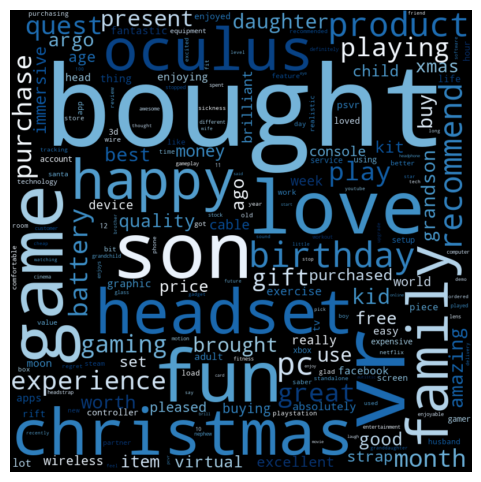

In [23]:
from wordcloud import WordCloud

keyword_frequencies = dict(all_sorted_keywords)

wordcloud = WordCloud(background_color='black', colormap='Blues', width=800, height=800)

wordcloud.generate_from_frequencies(keyword_frequencies)

# Generate the wordcloud from the keywords

# Display the wordcloud
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see fron the Wordcloud that the Meta Quest 2 VR headset is a popular choice for gift giving, as the words "bought", "Christmas", "birthday", and "present" all appear prominently. This suggests that the headset is a well-liked and widely-appreciated gift. Additionally, the words "fun", "amazing", "love"and "quality" suggest that the headset is enjoyable to use and well-made. The word "family" also appears, indicating that the headset is enjoyed by multiple people in a household. Overall, the wordcloud suggests that the Meta Quest 2 VR headset is a well-received and widely-used product as a gift.

We will explore keyword frequencies for each topic to gain more valuable insights.

### 5.3.2.Visualization of Keyword Frequencies per Topic

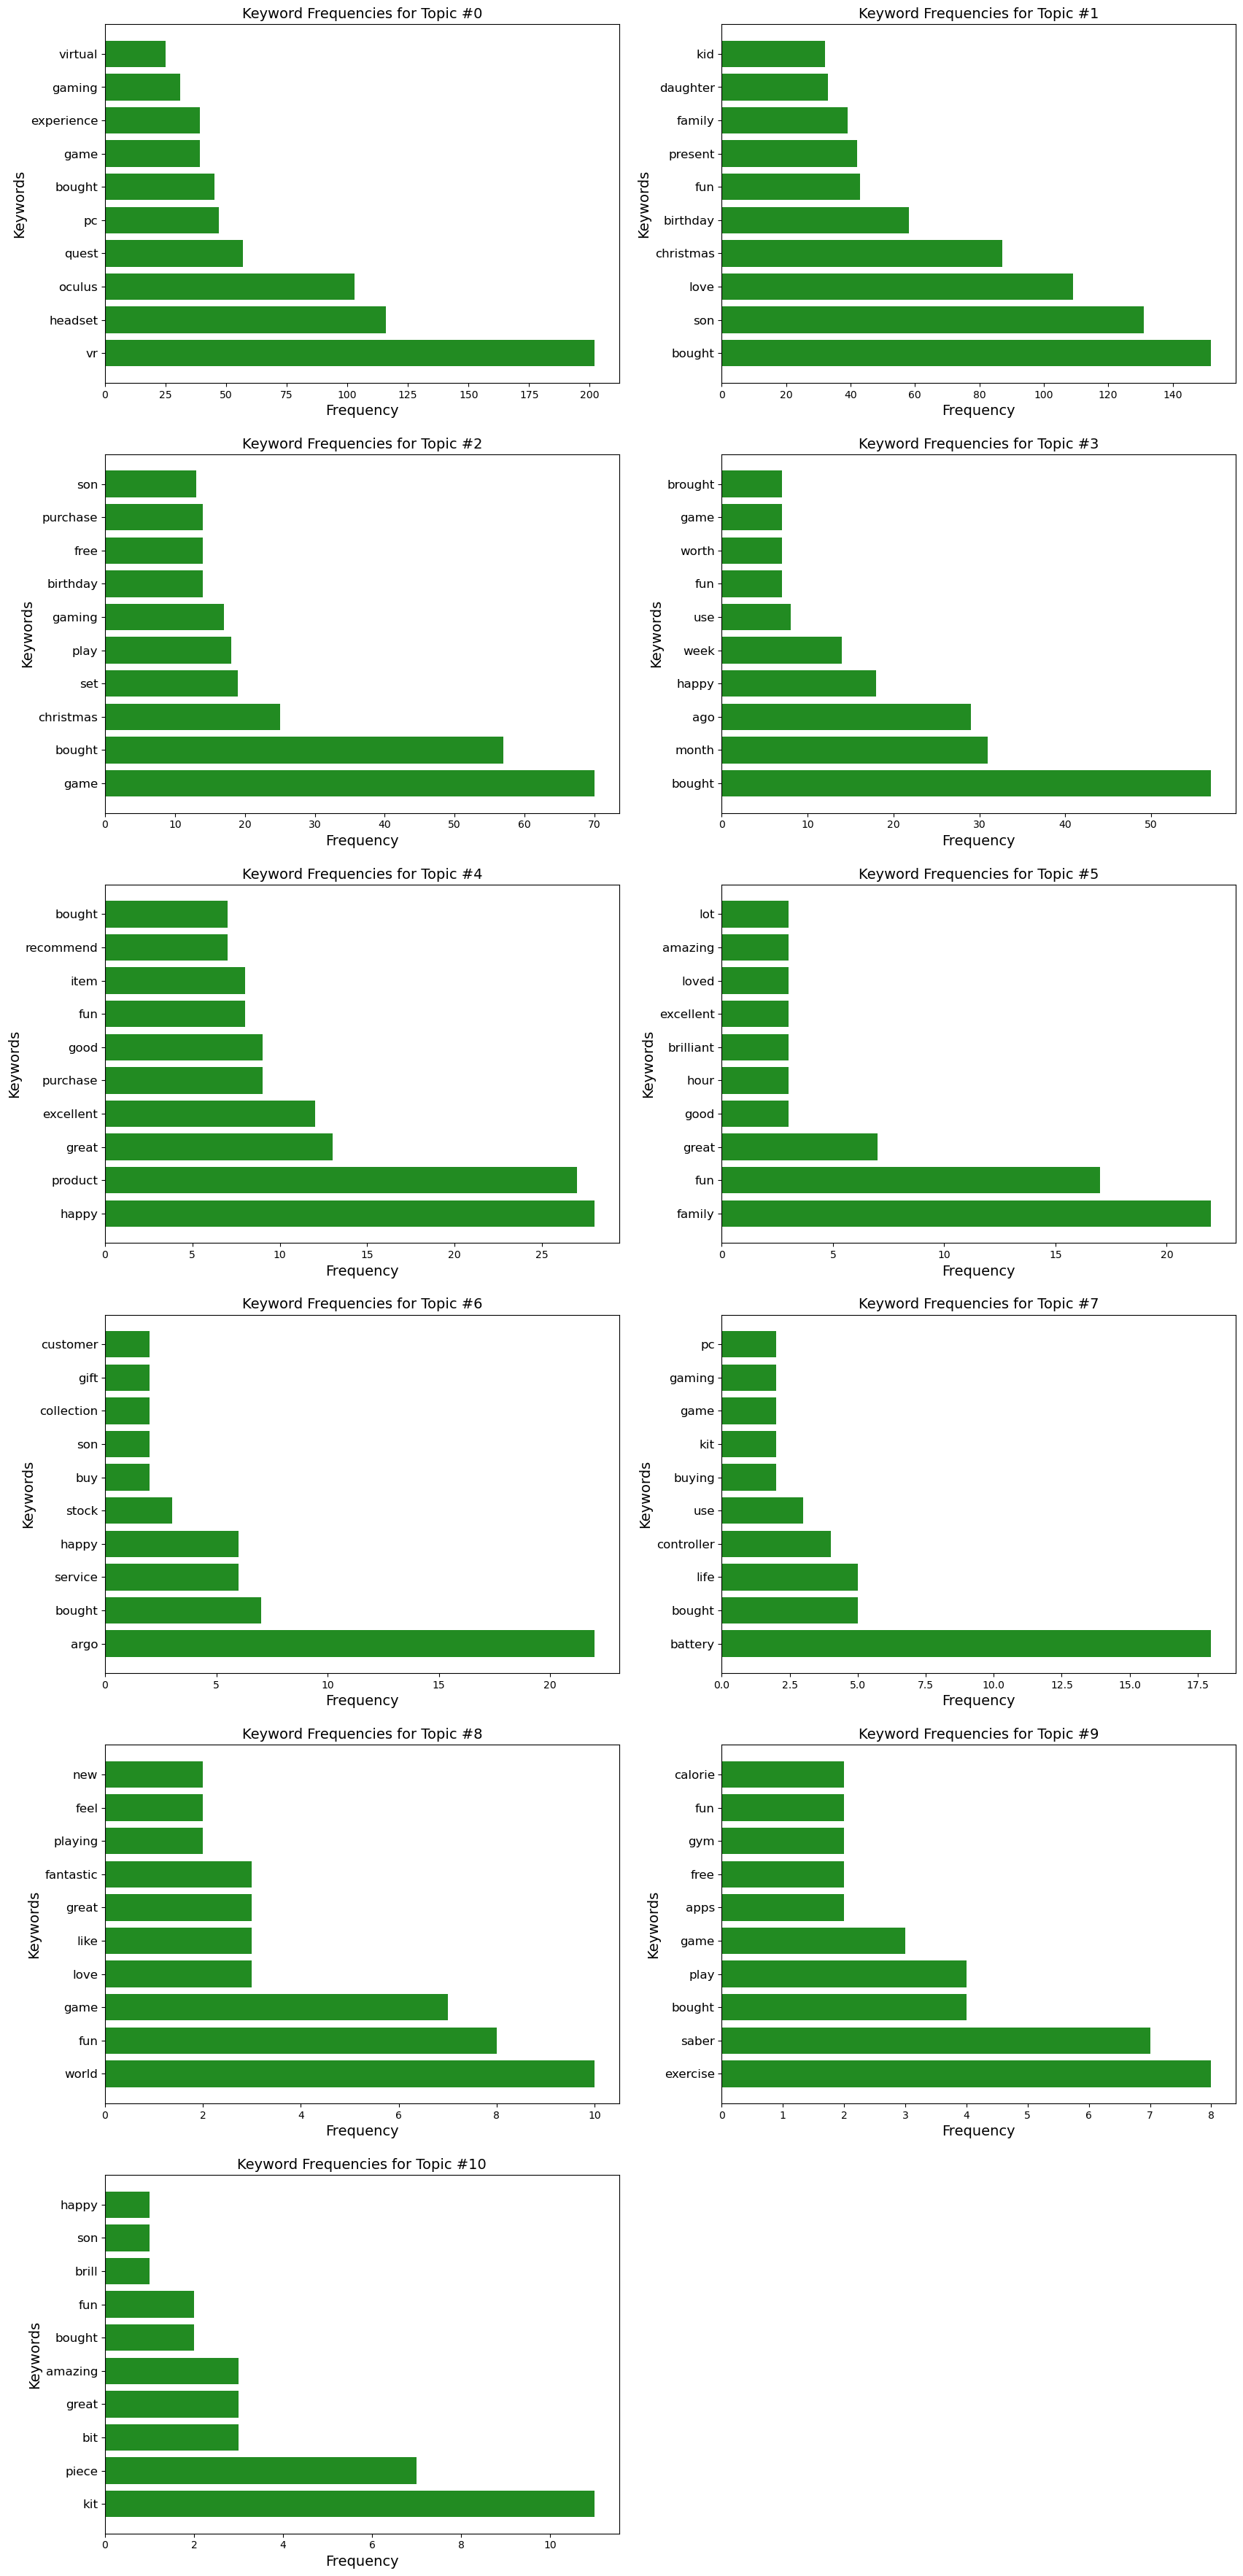

In [24]:
# Set the figure size
plt.figure(figsize=(20, 60))

# Loop over the range 0 to the length of the sorted_keywords_by_topic 
for topic in range(len(sorted_keywords_by_topic)):
    # Get the sorted topic keywords and frequencies
    keywords, frequencies = get_keywords_frequencies(get_sorted_topic_keywords(topic))

    # Create a subplot
    ax = plt.subplot(8, 2, topic + 1)
  
    # Call the generate_barh function and pass the ax object
    generate_barh(keywords, frequencies, ax, topic)

# Show the plot
plt.show()

We can see again that the Meta Quest 2 is generally well-liked by reviewers. The sentiment analysis indicated that 90% of the reviews were positive, and the keywords "happy", "great", "excellent", "good", and "fun" all appear in the keyword frequencies from various topics.

The Meta Quest 2 may have some additional features or accessories that are appreciated by reviewers: The keywords "set", "free", and "kit" all appear in the keywords for various topics. This could suggest that the VR headset may have some additional features or accessories that are appreciated by reviewers.

We can also see in the top frequent words in topic 7 includes "battery" and "life," as well as other words related to battery performance, such as "use" and "controller." The high frequency of these words suggests that battery life is an important consideration for customers when evaluating the VR headset, maybe a pontential issue with the battery?

We will breakdown the sentiment by topic to gain more insight about battery in topic 7.


### 5.4.Analysing Sentiment by Topic
We will breakdown the sentiment by topic so that we can see how the sentiment of the reviews differs across different topics. 

#### 5.4.1.Breakdown sentiment by topic

Breaking down sentiment by topic means analyzing the sentiment of the reviews for each topic separately. Here's the procedure to break it down:

<ol>
    <li>Create an empty dictionary called <code>topic_sentiment </code> </li>
  <li>Group the data in the <code>df</code> DataFrame by the "topic" column</li>
  <li>For each group of data in the "df" DataFrame:
    <ul>
      <li>Assign the "sentiment" column of the group to a variable called <code> df_ </code></li>
      <li>Calculate the percentage of each sentiment value in <code> df_ </code> and store the results in <code> topic_sentiment </code> with the group's "topic" as the key</li>
    </ul>
  </li>
  <li>Convert <code> topic_sentiment </code> to a DataFrame and display it</li>
</ol>

The resulting DataFrame will have one row for each topic and columns for each sentiment value and the corresponding percentage.

In [25]:
# breakdown sentiment by topic
topic_sentiment = {}
for topic, df_ in df.groupby("topic"):
    topic_sentiment[topic] = df_["sentiment"].value_counts() / len(df_) * 100
pd.DataFrame(topic_sentiment)

,-1,0,1,2,3,4,5,6,7,8,9,10
negative,2.307692,4.113111,2.793296,4.458599,8.433735,NaN,NaN,4.166667,4.545455,9.523810,6.25,NaN
neutral,9.230769,2.313625,8.379888,0.636943,3.614458,NaN,NaN,NaN,18.181818,4.761905,6.25,NaN
positive,88.461538,93.573265,88.826816,94.904459,87.951807,100.0,100.0,95.833333,77.272727,85.714286,87.50,100.0


To better understand the results, we will create a visualization to represent the sentiment per topic more intuitively.

#### 5.4.2.Visualize Sentiment per Topic

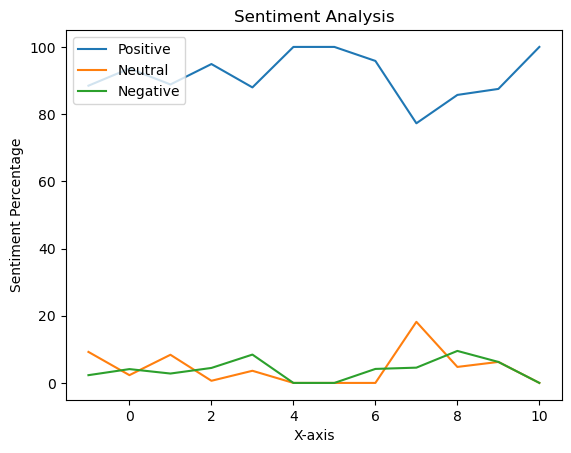

In [26]:
import matplotlib.pyplot as plt

# get the values from the topic_sentiment dict and store them in separate lists
x_values = list(topic_sentiment.keys())
positive_values = []
neutral_values = []
negative_values = []

# iterates through the dictionary topic_sentiment
# extract the values for the keys "positive", "neutral", and "negative"
# for each key-value pair.
# If a key does not exist in the value, it appends 0 to the corresponding lists (pos, neg or neu lists above)
for key, value in topic_sentiment.items():
    if 'positive' in value:
        positive_values.append(value['positive'])
    else:
        positive_values.append(0)
    if 'neutral' in value:
        neutral_values.append(value['neutral'])
    else:
        neutral_values.append(0)
    if 'negative' in value:
        negative_values.append(value['negative'])
    else:
        negative_values.append(0)

# create the line chart
plt.plot(x_values, positive_values, label='Positive')
plt.plot(x_values, neutral_values, label='Neutral')
plt.plot(x_values, negative_values, label='Negative')

# add a title and axis labels
plt.title('Sentiment Analysis')
plt.xlabel('X-axis')
plt.ylabel('Sentiment Percentage')

# add a legend
plt.legend(loc='upper left')

# show the plot
plt.show()

it appears that there is a significant decline at topic 7 in the percentage of positive sentiment and an increase in neutral and negative sentiment. This suggests that there are issues with the battery life of the Meta Quest 2 that are causing dissatisfaction among users. The specific reasons for this decline in positive sentiment could be further explored.

In [27]:
df[(df.topic == 7)]

,title,reviews,location,timestamp,sentiment,topic
48,Incredible tech,apprehensive buying thought might something use couple time put never use wrong use every day completely different way play game socialise careful though found certain game experience give motion sickness eye strain prolonged use also battery life terrible charging lot let thing put though really amazing bit kit,Stoke-on-Trent,2022-10-19,positive,7
72,Faulty controller,one controller keep sticking,N/A,2022-09-27,neutral,7
159,Love it,brilliant system bug still expected battery life bout 2hours advanced gaming purchase elite head strap additional battery pack really made white though due sweat turning greyish brown haha,Sheffield,2022-07-13,positive,7
240,Great quality,bought son happy thing would suggest hand controller instead battery built battery charge otherwise absolutely fantastic,Portslade,2022-05-10,positive,7
244,Good,side u battery u dnt pc steam,Birmingham,2022-05-04,neutral,7
311,Really cool,small full power lightweight,London,2022-03-23,neutral,7
328,"Amazing VR, good build quality",downside short battery life approx 1 5 hour might positive stop playing eleven table tennis day,N/A,2022-03-16,positive,7
450,What i was expecting from it,bought month two ago non stop thing thats negative battery life,Sheffield,2022-02-11,negative,7
482,It's almost great,battery last long ok remote started going one way 2 week also need space play game overall great product,N/A,2022-02-08,positive,7
583,Amazing,battery life bit rubbish amazing product,N/A,2022-01-19,positive,7


We can see from these reviews of topic 7 that many of the reviewers mentioned that the battery life is a concern for example, in index 583, the reviewer said that the battery life is abit rubbish however the product is amazing. We can also see in index 450 said that the battery life is negative.

We will explore and can gain more insights about topic 7 and other topics using the representative documents which is more reliable in the next section. 

### 5.6.Topic Insights with Representative documents

We will explore the results of our topic modeling by interpreting the representative documents for each identified topic. They are chosen based on their high relevance to a particular topic and their ability to capture the main themes and ideas present in the dataset. We can gain insights into the content and focus of each topic. We will also consider any common patterns or issues that emerge across multiple topics.


In [30]:
# create dataframe with a column for the topic number and representative document
df_ = pd.DataFrame(columns=['topic_num', 'representative_doc'])

# loop through the topic numbers and representative documents
for topic_num in range(11):
    representative_doc = topic_model.representative_docs_[topic_num]
    # add a new row to the dataframe with the topic number and representative document
    df_ = df_.append({'topic_num': topic_num, 'representative_doc': representative_doc}, ignore_index=True)
df_

,topic_num,representative_doc
0,0,"[play video game get workout excellent technology great way experience video game different dimension get used motion screen front enjoy moment technology great experience pas get added benefit getting workout hour beat saber really get sweat get heart pumping love using mine used almost every day since even meeting friend virtual room chatting like right front, headset amazing picture clear look fantastic easy put play friend around world even work small space wish battery lasted longer last couple hour would highly recommend, bought oculus son thinking oil like vr brand know next level boy asked play stop playing absolutely loving]"
1,1,"[bought xmas went bought another one good, got 9yo fir christmas absolutely love great value money, bought 11 yr old son love]"
2,2,"[bought christmas present son loved take evan older daughter enjoyed grate could take require electronic e g pc tv loved gift considering bye think twice, partner bought 12 yr old 10 yr old love graphic excellent easy load pay game app depending game keep kid active moving around even adult loving, brought child christmas honestly say best christmas present got easy use heavy head load choice game store easy set tutorial easy follow]"
3,3,"[bought two month ago happy enjoy since, bought month ago happy, bought monts ago happy use]"
4,4,"[work great issue far, really excellent product, amazing product]"
5,5,"[great game member family loved, excellent family friend good fitness well active, great fun family]"
6,6,"[always happy everything purchased argo, bought ago partner love great service argo always, happy find argo needed ordered game son]"
7,7,"[content purchase endless amount fun thing battery last long 2 hour overcome connecting long usb c power bank, bought month two ago non stop thing thats negative battery life, downside short battery life approx 1 5 hour might positive stop playing eleven table tennis day]"
8,8,"[absolutely blown mind feel like im different world play hour forget im stood lounge love much, get one much fun, fantastic world]"
9,9,"[bought week ago glad one best way play exercise beat saber favourite way pas time, bought month ago really gamer needed start exercise hate meta quest 2 fun exercising beat saber favourite lot feature make great purchase, bought week ago still enjoying every day good stuff burn calorie daily exercise]"


We can see in the representative document Topic 7, "bought month two ago non stop thing thats negative battery life" and "downside short battery life approx 1 5 hour might positive stop playing eleven table tennis day" this clearly describes the battery life in a negative way.

We can also see that in the representative document in Topic 5, "excellent family friend good fitness well active" which suggests that the Meta Quest 2 helps people stay active and fit.

For the rest of the topics, We can see in the representative documents that they are talking about their experiences with the Meta Quest 2. We can see that the sentiment of the reviewers appears to be very positive. Finally, it also seems that the Meta Quest 2 headset is enjoyed as a gift "bought xmas" " bought 11 yr old son", and appears to be well-received "happy", "great".

### 5.7.Topics over Time
topics over time is a visual representation of the prevalence of  topics in a dataset over a period of time.

<code> note that you need to run this code on jupyter notebook to see the plot </code>

In [ ]:
topics_over_time = topic_model.topics_over_time(docs, df['timestamp'])
topic_model.visualize_topics_over_time(topics_over_time)

<code>We saved the topics over time as an image in case the BERTopic visualization of topics overtime doesn't work, as it is an interactive plot. This way, we can still view and analyze the trends in the topics over time even if the interactive plot is not functioning properly. </code>

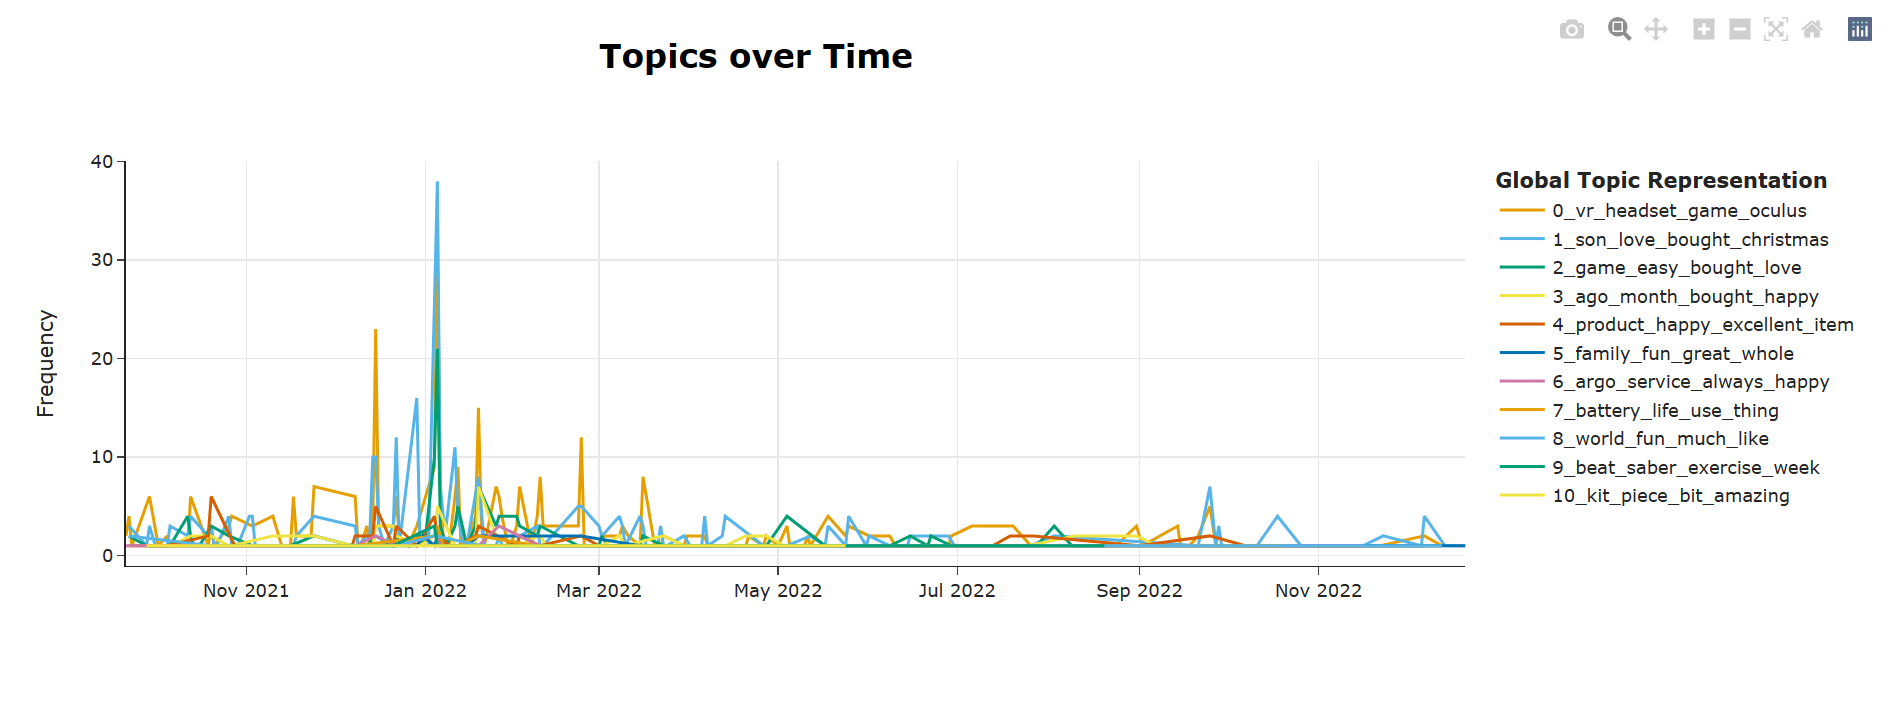

In [32]:
from IPython.display import display
from PIL import Image

# Read the image file into memory using the Image class
image = Image.open("assets/topics-over-time.png")

# Display the image
display(image)

We can see that there was a significant increase in the number of reviews discussing VR technology and the Meta Quest 2 headset (topic 0) and the product being purchased as a gift, particularly for Christmas (topic 1) in the period from December 2021 to February 2022. This could suggest that the VR headset was a popular gift during the holiday season and that there was an overall increase in interest in the product during this time. The other topics also experienced a peak in this time period, but not to the same extent as topics 0 and 1, suggesting that they may not have been as central to the conversations around the product during this time.

## 6.External Validation
Incorporating independent findings into our conclusions is essential for ensuring the validity and credibility of our study. By consulting external evidence, we can validate our own conclusions. Additionally, considering multiple perspectives and professional respectable sources can help us to better understand the concerns of the product.

According to PCMag [13], battery life is one of the main issues for standalone VR headsets, including the Meta Quest 2. CNET [14] reports that the headset has a battery life of two to three hours, which may not be sufficient for longer play sessions. Techspot [15] lists the short battery life as a con of the headset, stating that it only lasts for two to three hours. Mashable [16] also notes that the battery life of the Meta Quest 2 VR headset could be longer. These findings from independent tech industry sources [13, 14, 15, 16] suggest that battery life may be a concern for users of the Meta Quest 2 VR headset.

## 7.Conclusion
Our analysis of customer reviews of the Meta Quest 2 VR headset revealed that battery life was a common concern among users. Upon conducting sentiment analysis on this topic, we observed a decline in positive sentiments and an increase in neutral and negative sentiments in the topic about battery. This trend suggests that the battery lifespan of the Meta Quest 2 VR headset may be perceived as short by users. To further confirm our findings, we consulted multiple well-respected tech industry sources, including PCMag [20], CNET [21], Techspot [22], and Mashable [23], which all identified battery life as a common drawback of the Meta Quest 2 VR headset. 

In summary, our study concluded that the battery lifespan of the Meta Quest 2 VR headset has a potential area for improvement. as supported by both our analysis on the customer reviews and independent sources.

## 8.Future Work

- Explore other neural models for Topic Modelling and compare their performance to the BERTopic model 
- Investigate the effectiveness of the extracted keywords for applications such as text summarization 
- Apply Time-series analysis to see the relationship between sentiment over time 
 


## 9.References and Resources
### 9.1.References

#### General
- Topic modelling inspired from https://towardsdatascience.com/topic-modeling-with-bert-779f7db187e6
- Sentiment Analysis inspired from https://www.analyticsvidhya.com/blog/2022/10/sentiment-analysis-using-vader/
- [1] Sentiment analysis: Why it's necessary and how it improves CX from https://www.techtarget.com/searchcustomerexperience/tip/Sentiment-analysis-Why-its-necessary-and-how-it-improves-CX 
- [2] Meta Quest 2 Good price for value from https://arstechnica.com/gaming/2022/07/despite-100-price-increase-meta-quest-2-still-offers-historically-cheap-vr/
- [3] Sentiment Analysis definition from https://en.wikipedia.org/wiki/Sentiment_analysis
- [4] Topic modelling definition from https://en.wikipedia.org/wiki/Topic_model
- [7] Selenium definition from https://www.guru99.com/introduction-to-selenium.html
- [8] Topic Modelling definition from https://monkeylearn.com/blog/introduction-to-topic-modeling/ 
- [9] BERTopic definition and topic outlier https://maartengr.github.io/BERTopic/faq.html
- [10] KeyBERT and BERTopic from https://maartengr.github.io/KeyBERT/
- [11] Lemmatize definition from https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
- [12] Keywords definition from https://maartengr.github.io/KeyBERT/api/keybert.html

####  Ethical considerations 
- [5] Argos terms and conditions from https://www.argos.co.uk/help/terms-and-conditions/
- [6] Argos robots.txt from https://www.argos.co.uk/robots.txt

#### External Validation and Conclusion

- [13] PCMag Oculus Quest 2 review from https://www.pcmag.com/reviews/oculus-quest-2
- [14] CNET Oculus Quest 2 review from https://www.cnet.com/tech/gaming/facebook-oculus-quest-2-vr-review-one-of-my-favorite-game-consoles/
- [15] Techspot Oculus Quest 2 review from https://www.techspot.com/products/audio-video/oculus-quest-2.224801/
- [16] Mashable Oculus Quest 2 review from https://mashable.com/review/oculus-quest-2-review 

### 9.2.Code
#### General
- Using lambda function with Pandas DataFrames from https://pandas.pydata.org/pandas-docs/stable/user_guide/apply.html
- Lambda function with pandas DataFrame from : www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/
- Error Handling and Defensive coding from Dr. Matthew Yee-King CM2010 Software Design And Development Topic 3

#### Web Scraping 
- 5.13 Webscraping and APIs with Llewelyn Fernandes
- Selenium waits from https://selenium-python.readthedocs.io/waits.html
- Worked examples of lambda function from https://sparkbyexamples.com/pandas/pandas-apply-with-lambda-examples/
- Validating string from https://bobbyhadz.com/blog/python-validate-string-input

#### Data and Text Preprocessing 
- Converting string to datetime format and object inspired from https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
- Removing special charactres and punctuations code inspired from https://stackoverflow.com/questions/18429143/strip-punctuation-with-regex-python 
- Removing stop words inspired from https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
- Lemmatizing using NLTK from https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
- removing stop words with NLTK from https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

#### Sentiment Analysis
- Revision lab 3 - pre-processing text Dr. Sean McGrath
- Sentiment Analysis using Vader from https://www.nltk.org/api/nltk.sentiment.vader.html
- Sentiment Analysis calculatuing compound score from https://github.com/cjhutto/vaderSentiment#about-the-scoring

#### Topic Modelling
- Topic Modelling with BERT from https://towardsdatascience.com/topic-modeling-with-bert-779f7db187e6
- Dinensionality reduction from https://en.wikipedia.org/wiki/Dimensionality_reduction
- BERTopic from https://spacy.io/universe/project/bertopic
- BERTopic, Getting the same results https://maartengr.github.io/BERTopic/faq.html#why-are-the-results-not-consistent-between-runs
- BERTopic, Calculate topics probability from https://maartengr.github.io/BERTopic/faq.html#how-do-i-calculate-the-probabilities-of-all-topics-in-a-document

#### Visualization
- BERTopic Visualization from https://maartengr.github.io/BERTopic/getting_started/visualization/visualization.html
- Wordcloud inspiration from https://www.kaggle.com/code/anandhuh/word-cloud-in-python-for-beginners